In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
df = pd.read_csv("listings.csv")

In [179]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.66719,-73.81580,Private room,50.0,1,242,2024-02-10,1.91,1,0,48,NaN
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.65789,-73.75370,Entire home/apt,70.0,28,9,2022-08-17,0.08,1,349,0,NaN
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,125.0,2,291,2023-11-19,2.52,4,357,8,NaN
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.64615,-73.75966,Entire home/apt,68.0,2,333,2024-02-01,3.12,2,148,28,NaN
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.65222,-73.76724,Entire home/apt,140.0,1,306,2023-12-26,2.89,4,0,5,NaN


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              407 non-null    int64  
 1   name                            407 non-null    object 
 2   host_id                         407 non-null    int64  
 3   host_name                       407 non-null    object 
 4   neighbourhood                   407 non-null    object 
 5   latitude                        407 non-null    float64
 6   longitude                       407 non-null    float64
 7   room_type                       407 non-null    object 
 8   price                           407 non-null    float64
 9   minimum_nights                  407 non-null    int64  
 10  number_of_reviews               407 non-null    int64  
 11  reviews_per_month               407 non-null    object 
 12  calculated_host_listings_count  407 

In [180]:
df.drop(['license','neighbourhood_group','last_review'], axis = 1, inplace = True)

In [181]:
df['reviews_per_month'].fillna('No reviews', inplace=True)

In [182]:
df['price'].fillna(df['price'].median(), inplace=True)

In [183]:
# Check for missing values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [184]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1489424,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,242,1.91,1,0,48
1,2992450,Luxury 2 bedroom apartment,4621559,Kenneth,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,0.08,1,349,0
2,3820211,Restored Precinct in Center Sq. w/Parking,19648678,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,291,2.52,4,357,8
3,5651579,Large studio apt by Capital Center & ESP@,29288920,Gregg,SECOND WARD,42.646150,-73.759660,Entire home/apt,68.0,2,333,3.12,2,148,28
4,6623339,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,140.0,1,306,2.89,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1072781767409521866,The Bluebird’s Nest,426223840,Antonio,ELEVENTH WARD,42.663916,-73.777869,Entire home/apt,117.0,1,0,No reviews,2,0,0
403,1073179963201889958,In the heart of Albany,31994990,G.G.,SEVENTH WARD,42.644729,-73.776412,Entire home/apt,53.0,30,0,No reviews,2,271,0
404,1074653929117126641,Room available,480004905,Ramiz,ELEVENTH WARD,42.662827,-73.774371,Private room,60.0,1,0,No reviews,2,269,0
405,1075444056381274297,The Tangerine Door,542733174,Rebecca,TWELFTH WARD,42.679082,-73.795049,Entire home/apt,110.0,2,1,1.0,1,241,1


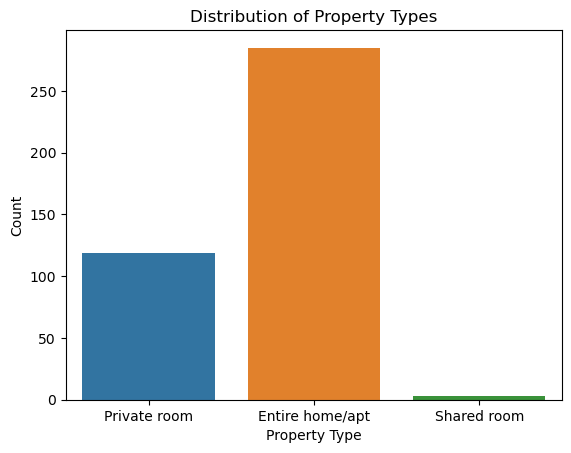

In [219]:
# Analyze demand for different property types
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

In [189]:
print("--- Price Per Night ---")
print("Minimum Price in $:", min(df['price']))
print("Maximum Price in $:", max(df['price']))
print("Average Price in $:", df['price'].mean())

--- Price Per Night ---
Minimum Price in $: 26.0
Maximum Price in $: 1750.0
Average Price in $: 122.54054054054055


In [192]:
# Grouping based on room types
private_room = df['room_type'] == 'Private room'
entire_home = df['room_type'] == 'Entire home/apt'
shared_room = df['room_type'] == 'Shared room'

# Calculating the avergae price in each neighbourhood
private_avg = df[private_room]['price'].mean()
entire_avg = df[entire_home]['price'].mean()
shared_avg = df[shared_room]['price'].mean()


print("--- Average Price of the Room Types ---")
print("Private Room:",private_avg)
print("Entire Home/Apt:",entire_avg)
print("Shared room:", shared_avg)

--- Average Price of the Room Types ---
Private Room: 82.66386554621849
Entire Home/Apt: 139.76140350877193
Shared room: 68.33333333333333


<AxesSubplot:xlabel='price', ylabel='Count'>

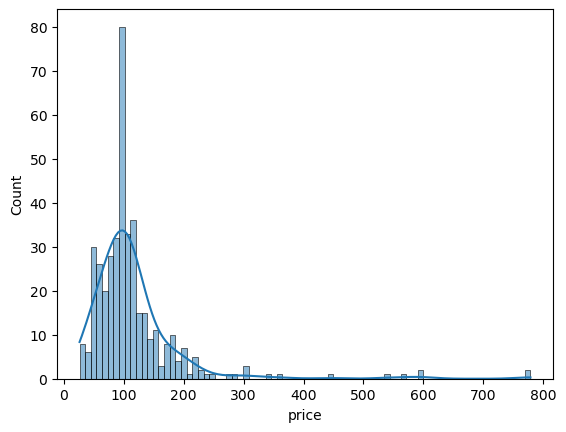

In [202]:
price_range = df[df['price'] <= 1000]
sns.histplot(data=price_range, x="price", kde=True, bins = 80)

In [197]:
#Cheapest Airbnbs in New York City
cheapest = df.sort_values(by = 'price', ascending = True)
cheapest.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
226,708067736362606372,"Hilts & Kinfolks, LLC - Albany Private Room 1",478008190,Edward,FOURTEENTH WARD,42.659359,-73.797269,Private room,26.0,30,4,0.27,3,306,2
225,708060437684762754,"Hilts & Kinfolks, LLC - Albany, Private Room 3",478008190,Edward,FOURTEENTH WARD,42.659297,-73.797201,Private room,27.0,30,2,0.13,3,341,1
224,708040907580174096,"Hilts & Kinfolks, LLC - Albany Private Room 2",478008190,Edward,FOURTEENTH WARD,42.660080,-73.798160,Private room,27.0,30,4,0.28,3,319,3
314,919729008458872053,1Private room1B nearly AlbMed& St.Peter's Hosp...,382446799,Elizabeth,NINTH WARD,42.655953,-73.780748,Private room,33.0,1,5,0.81,2,359,5
222,700172695352977293,"the Blake; Full bed in the city, free parking",442491470,Brigid,ELEVENTH WARD,42.662470,-73.774690,Private room,34.0,3,14,0.78,1,359,6
336,938431811499141903,The little room with TV and twin bed,116935236,Fs,THIRTEENTH WARD,42.669736,-73.786107,Private room,35.0,2,6,0.87,4,362,6
42,21769213,Cozy downstairs bedroom in quiet neighborhood!,135717458,Chad,ELEVENTH WARD,42.665720,-73.778340,Private room,35.0,10,23,0.31,3,248,5
43,21769439,Cozy upstairs room with (1) walk-in closet,135717458,Chad,ELEVENTH WARD,42.667030,-73.778420,Private room,35.0,10,21,0.28,3,0,3
62,31210362,Nest in Hazel,160340958,Jon,FIFTEENTH WARD,42.675190,-73.822810,Private room,39.0,2,27,0.44,1,354,1
38,21052414,Cozy bedroom with (2) walk-in closets,135717458,Chad,THIRTEENTH WARD,42.665650,-73.779750,Private room,40.0,10,40,0.58,3,312,5


In [199]:
#Most Expensive Airbnbs in New York City
luxury = df.sort_values(by = 'price', ascending = False)
luxury.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
392,1043698525924990350,Charming 1920s house sleeps 6-7,30218591,Rebecca,FIFTEENTH WARD,42.674320,-73.815552,Entire home/apt,1750.0,2,0,No reviews,1,60,0
177,621960198566758900,One-of-a-Kind Luxe Urban Farmhouse w/ Heated Pool,382970529,Thomas,FOURTEENTH WARD,42.667620,-73.799190,Entire home/apt,1209.0,2,7,0.36,10,191,2
262,795541666227926706,Victorian Mansion on Washington Park,493882819,Terra,NINTH WARD,42.656329,-73.775205,Private room,779.0,1,1,0.16,6,264,1
18,14989805,/Miller Colonial\ 1946 SUNY Eagle Hill 5Bed 2B...,4259750,Peter,FIFTEENTH WARD,42.673512,-73.819679,Entire home/apt,777.0,1,85,0.96,9,356,22
140,52691284,+ Perfect place to make memories with loved on...,232967878,Diana,TENTH WARD,42.662360,-73.792450,Entire home/apt,600.0,2,57,2.01,19,0,18
111,48470454,"/ New Giant Victorian \ 7beds 6 baths + 2x 85""...",4259750,Peter,THIRTEENTH WARD,42.665264,-73.786926,Entire home/apt,595.0,2,29,1.52,9,0,23
40,21449583,/zBig Blue Ranch\ 1962 SUNY Eagle Hill 4Beds 2...,4259750,Peter,FIFTEENTH WARD,42.675470,-73.824020,Entire home/apt,570.0,4,8,0.11,9,365,0
255,786196811078165173,Mansion in Albany 7minutes to Downtown Albany,444163492,Drasana,FOURTH WARD,42.679960,-73.753520,Entire home/apt,538.0,3,11,0.92,1,126,11
166,563711706943869398,/Purple Potty Penthouse\ 1928 Pine Hill 4Bed 1...,4259750,Peter,THIRTEENTH WARD,42.669190,-73.786720,Entire home/apt,444.0,2,6,0.25,9,364,0
334,938280419686165005,Carriage House The Argus Hotel,526358730,Argus,TENTH WARD,42.660363,-73.772902,Entire home/apt,364.0,1,5,0.79,12,286,5


In [194]:
most_reviews = df.sort_values(by = 'number_of_reviews', ascending = False)
most_reviews.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
49,25549565,Quiet and Pretty in the Heart of Center Square,9666970,Janet,SIXTH WARD,42.65345,-73.76450,Entire home/apt,65.0,1,770,11.12,1,0,131
11,10768745,Alb hospital area studio bath wifi. (Red),5691268,Elizabeth,FOURTEENTH WARD,42.66078,-73.80553,Entire home/apt,50.0,1,623,6.37,2,157,94
57,28722270,✍Historic Loft Suite @ Downtown Albany,44434571,Earl,SECOND WARD,42.64535,-73.75365,Entire home/apt,80.0,1,610,9.59,6,0,37
9,9005989,"Studio in The heart of Center SQ, in Albany NY",17766924,Sugey,SIXTH WARD,42.65559,-73.76506,Entire home/apt,86.0,1,577,6.3,1,0,39
58,28868857,⭐Cozy Garden Suite Full Amenities @Downtown Al...,44434571,Earl,SECOND WARD,42.64535,-73.75365,Entire home/apt,65.0,1,534,8.48,6,316,73
45,22431640,"Bright Central Apartment Near Hospital, Park and",108848737,Jake,SEVENTH WARD,42.64717,-73.77135,Entire home/apt,81.0,1,430,6.09,2,43,29
65,32993402,✨Historic Full Amenities 2BR Apt @Downtown Albany,44434571,Earl,SECOND WARD,42.64563,-73.75311,Entire home/apt,106.0,1,404,6.76,6,194,35
66,33558235,"❣️Historic, Spacious & Fun 2BR Apt @Dwtown Albany",44434571,Earl,SECOND WARD,42.64585,-73.75297,Entire home/apt,108.0,1,395,6.73,6,322,45
10,9501054,Spacious suite with full bath by Capital Center,29288920,Gregg,SECOND WARD,42.64734,-73.75851,Private room,61.0,2,365,3.73,2,157,38
48,24655782,⭐⭐Check it out! This apartmnt has a bunch of g...,108848737,Jake,SEVENTH WARD,42.64770,-73.77140,Entire home/apt,78.0,1,355,5.04,2,0,45


In [204]:
#Average_price of property according to the location
avg_preffered_price_df = df.groupby(['neighbourhood','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,EIGHTH WARD,Entire home/apt,174.571429
1,EIGHTH WARD,Private room,77.500000
2,ELEVENTH WARD,Entire home/apt,112.428571
3,ELEVENTH WARD,Private room,57.916667
4,FIFTEENTH WARD,Entire home/apt,376.076923
5,FIFTEENTH WARD,Private room,53.250000
6,FIFTH WARD,Entire home/apt,106.333333
7,FIFTH WARD,Private room,68.500000
8,FIRST WARD,Entire home/apt,123.222222
9,FOURTEENTH WARD,Entire home/apt,207.538462


In [214]:
host_based_on_availability_df = df.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = True)
host_based_on_availability_df

,host_id,host_name,availability_365
154,456511812,Evolve,0.0
169,481974689,Lucy,0.0
148,439560254,Sean,0.0
164,474123093,Lipa,0.0
107,241123402,JShing,0.0
...,...,...,...
118,283643924,Joseph,364.0
179,502751555,Grace,364.0
147,438504176,Roland,364.0
104,222612368,Patrick,364.0


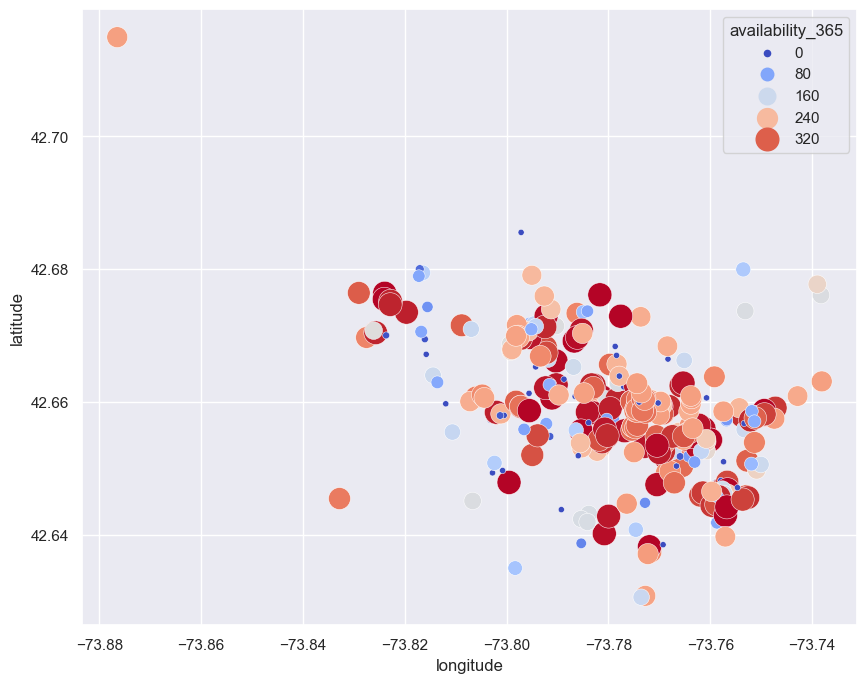

In [239]:
f, ax = plt.subplots(figsize=(10, 8))
ax=sns.scatterplot(data=df,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365',
    sizes=(20,300))


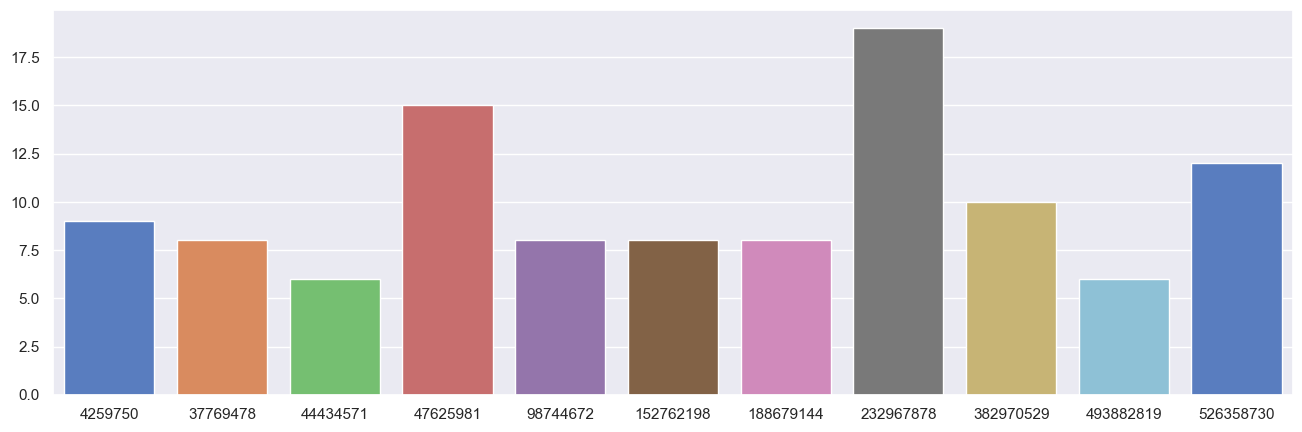

In [245]:
#Top 10 most popular Airbnb hosts
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df.index,y=df.values,palette="muted")
plt.show()

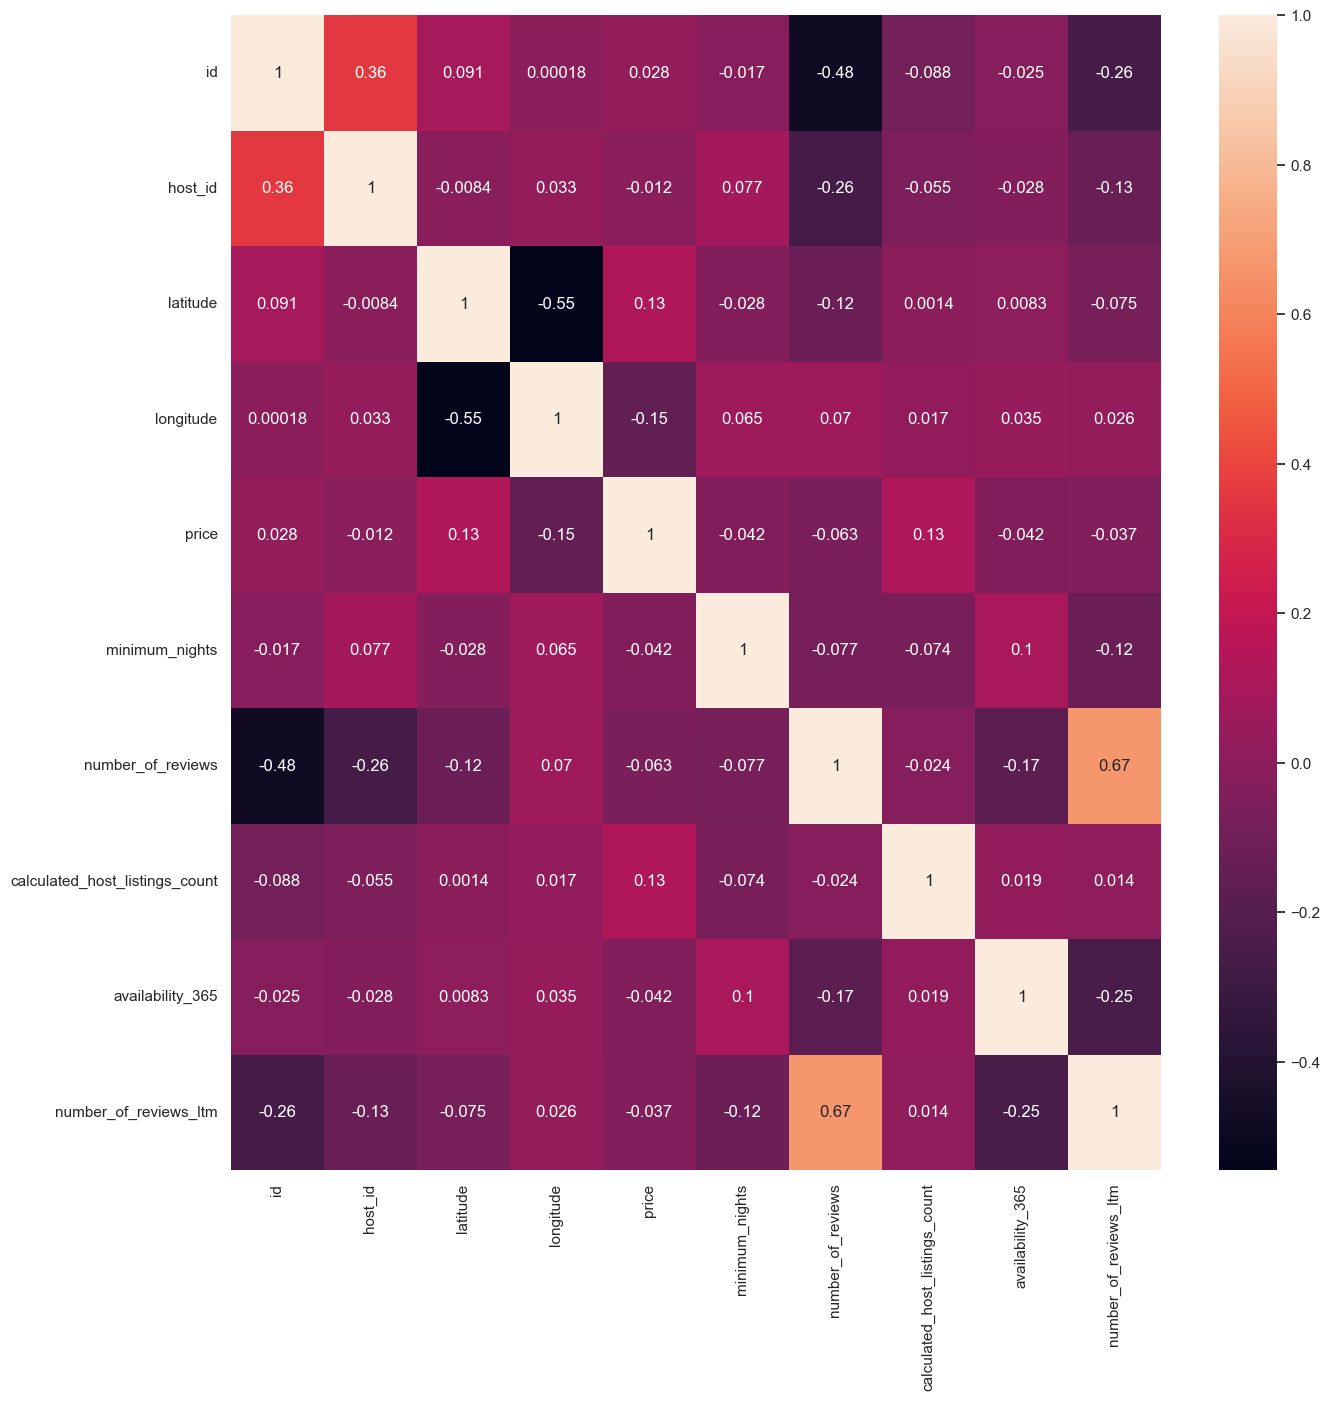

In [230]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()